# Problem statement

The primary goal is to develop a Product Categorization model leveraging clustering techniques. By analyzing the E-Commerce dataset provided by The UCI Machine Learning Repository, this model aims to automatically group products into meaningful categories based on their features, such as product description, price, customer reviews, and more.

The dataset contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retailer.

The dataset contains the following columns:
- InvoiceNo (integer)
- StockCode (string)
- Description (string)
- Quantity (integer)
- InvoiceDate (date)
- UnitPrice (decimal)
- CustomerID (integer)
- Country (string)

The notebook contains 4 exercises in total:

* [Exercise 1](#ex_1)
* [Exercise 2](#ex_2)
* [Exercise 3](#ex_3)
* [Exercise 4](#ex_4)

## Steps to follow

- **Load the Dataset**: Use Pandas to read the CSV file.
- **Preprocess the Data**: Clean and preprocess the Description text data.
- **Feature Extraction**: Use TF-IDF to convert text descriptions into a vectorized format.
- **Clustering**: Apply the K-Means algorithm to cluster products into categories based on their descriptions.
- **Dimensionality Reduction for Visualization**: Use PCA to reduce the dimensions of the TF-IDF vectors for visualization.
- **Visualize Clusters**: Create a 3D scatter plot of the clusters.

In [ ]:
from google.colab import files
uploaded = files.upload() #Taking long time to load file, so uploading the file to the file explorer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


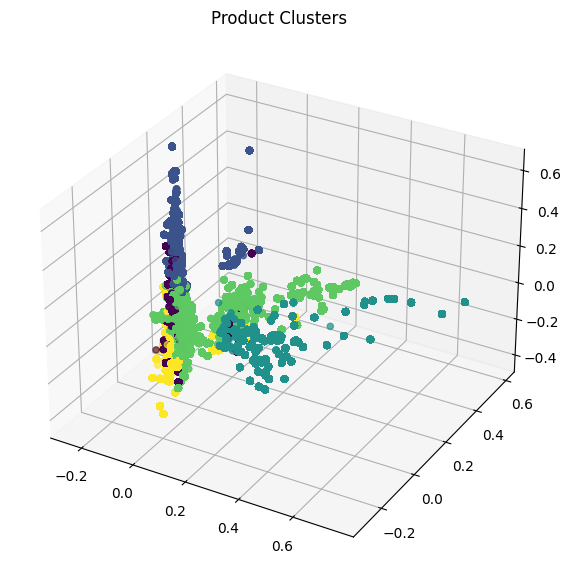

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Step 2: Load the Dataset
# Update this path to where you have stored the dataset
df = pd.read_csv('/content/clustering-data.csv', encoding='latin1')

# Step 3: Preprocess the Data
def preprocess_text(text):
    # Tokenize, remove stopwords, and keep only alphabetic words
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    return ' '.join(tokens)

# Applying the preprocessing function to the Description column
df['Processed_Description'] = df['Description'].dropna().apply(preprocess_text)

# Step 4: Feature Extraction
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Processed_Description'].dropna())

# Step 5: Clustering
num_clusters = 5  # You might want to adjust this based on experimentation
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

# Step 6: Dimensionality Reduction for Visualization
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())

# Step 7: Visualize Clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(reduced_features[:,0], reduced_features[:,1], reduced_features[:,2],
                     c=clusters, cmap='viridis')
ax.set_title('Product Clusters')
plt.show()


 Visualise most frequent words occurring in product descriptions assigned to clusters.

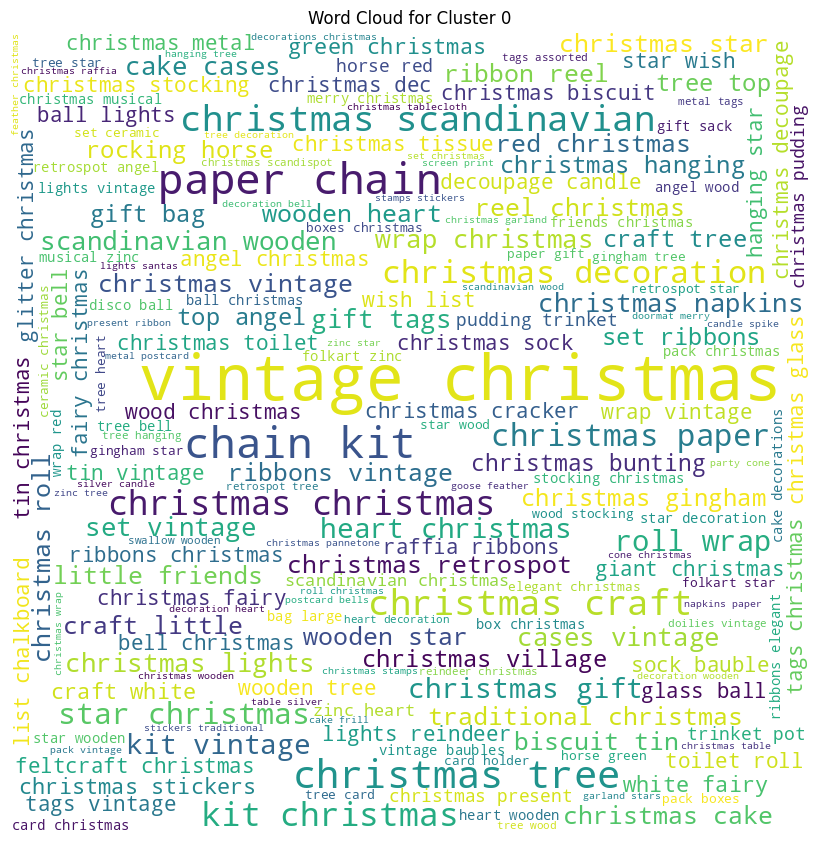

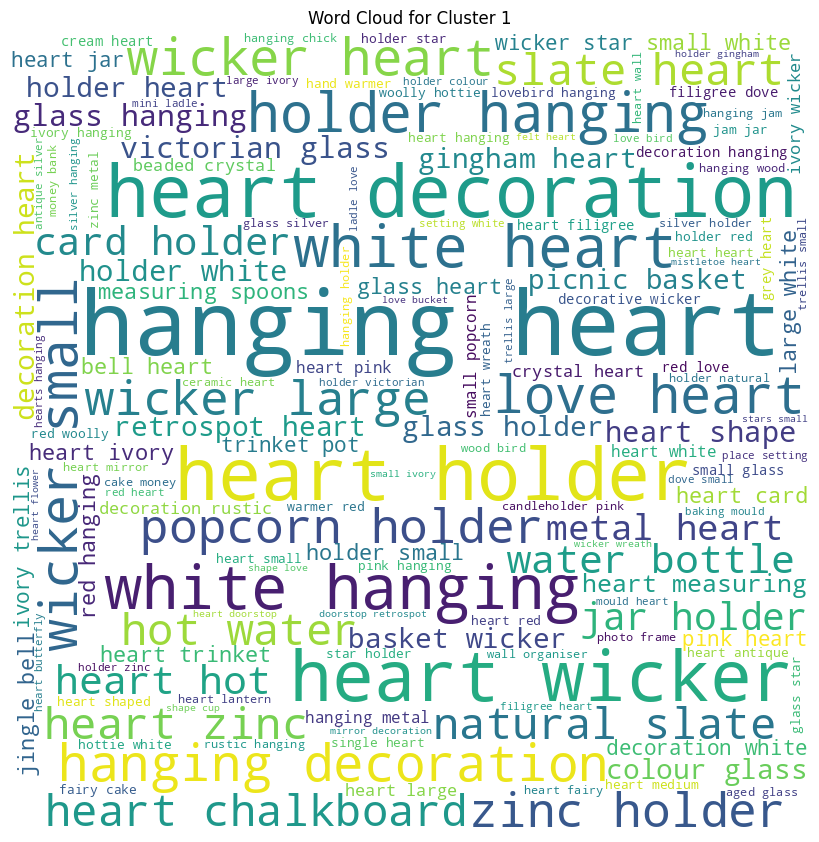

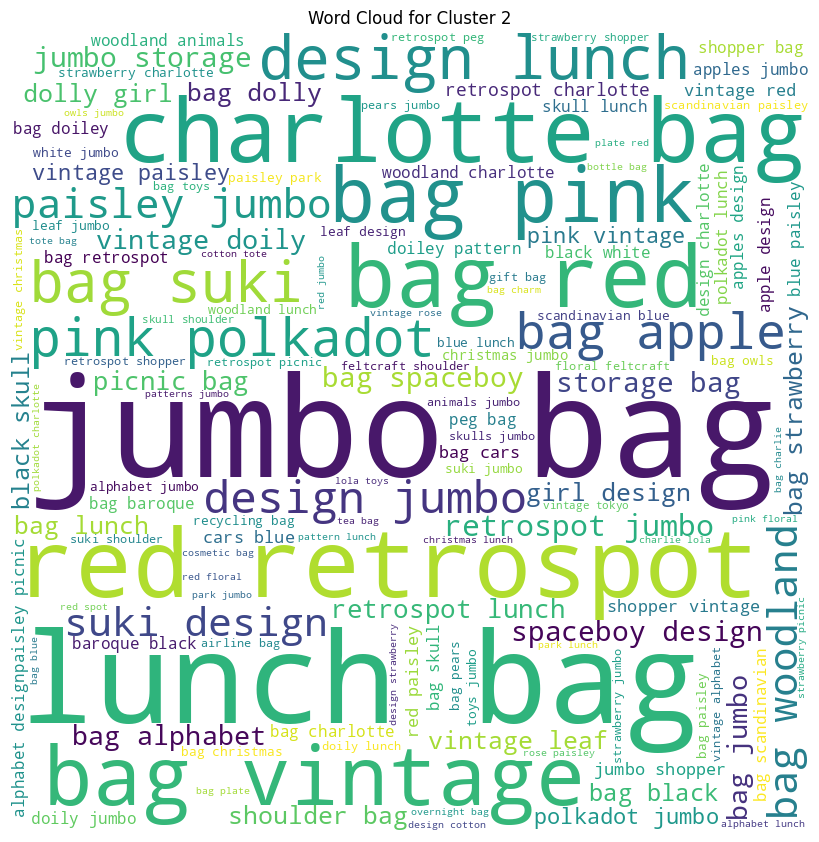

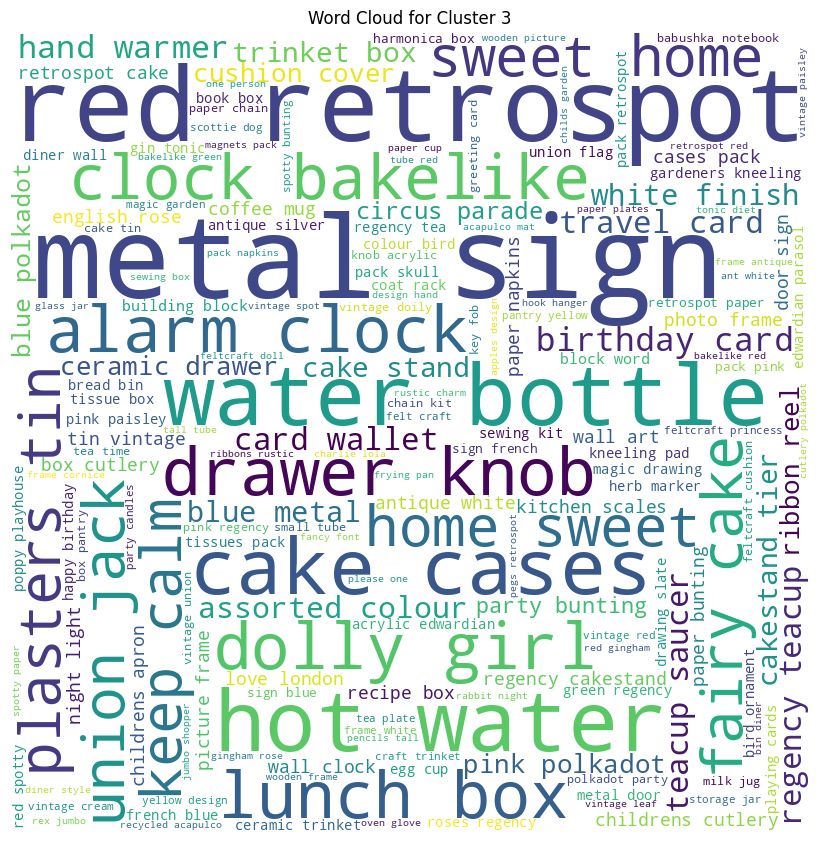

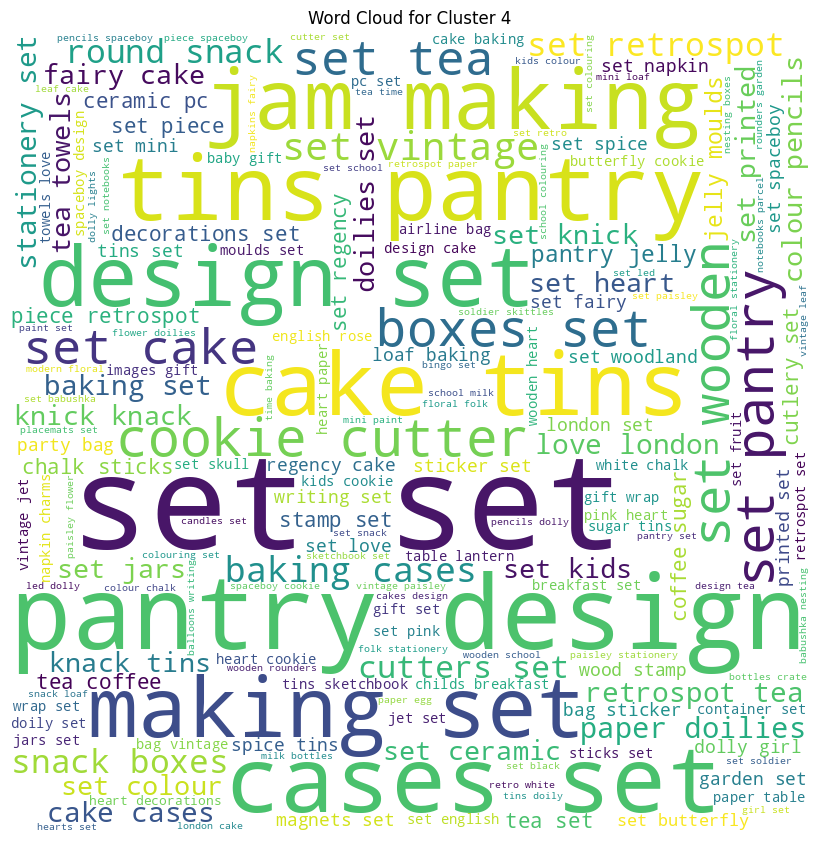

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_clouds(n_clusters, cluster_assignments, documents):
    """
    Generates and displays word clouds for each cluster.

    Parameters:
    - n_clusters (int): Number of clusters.
    - cluster_assignments (array-like): Cluster assignment for each document.
    - documents (array-like): Preprocessed text documents.
    """
    # Iterate through each cluster
    for cluster in range(n_clusters):
        # Filter documents belonging to the current cluster
        cluster_documents = [doc for doc, assignment in zip(documents, cluster_assignments) if assignment == cluster]

        # Join documents into a single string
        text = " ".join(cluster_documents)

        # Generate a word cloud
        wordcloud = WordCloud(width = 800, height = 800,
                              background_color ='white',
                              stopwords = stopwords.words('english'),
                              min_font_size = 10).generate(text)

        # Plot the word cloud
        plt.figure(figsize = (8, 8), facecolor = None)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.tight_layout(pad = 0)
        plt.title(f'Word Cloud for Cluster {cluster}')
        plt.show()

# Example usage
generate_word_clouds(num_clusters, clusters, df['Processed_Description'].dropna().tolist())


<a name="ex_1"></a>
## Exercise 1

Use the describe() function to generate descriptive statistics of the dataset.

This function provides a concise summary of the columns, including count, mean, standard deviation, min, max, and quartile values.

**Questions**:
- What insights can you derive from the output of the describe() method regarding the scale of the data and its distribution?
- How might these statistics influence your preprocessing decisions?

In [ ]:
# Get descriptive statistics for numeric columns
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


*What insights can you derive from the output of the describe() method regarding the scale of the data and its distribution?*

**Answer**

The output from the `describe()` method provides a statistical summary of the dataset across three variables: Quantity, UnitPrice, and CustomerID. Here are some insights we can derive from the provided data:

1. **Count**: The count shows the number of non-null entries for each variable. We have 541909 entries for Quantity and UnitPrice, but only 406829 for CustomerID, indicating missing values in the CustomerID column.

2. **Mean**: The mean provides the average value for each variable. The average quantity is about 9.55, which suggests that on average, around 9 to 10 items are purchased in each transaction. The average unit price is approximately 4.61, indicating the average price of an item is around this value.

3. **Standard Deviation (std)**: The standard deviation shows the variability of the dataset. A high standard deviation in Quantity (218.08) and UnitPrice (96.76) indicates a wide dispersion of values, suggesting significant variations in order sizes and item prices.

4. **Min and Max**: The minimum and maximum values show the range of the data. Notably, the Quantity and UnitPrice columns have negative values as their minimum, which might indicate returns or corrections in the data. The max values are quite high, especially for Quantity (80995), suggesting some very large transactions or possible outliers.

5. **Percentiles (25%, 50%, 75%)**: The percentiles give an idea about the distribution of the data:
   - **25% (1st Quartile)**: 25% of the transactions have a quantity of 1 or less and a unit price of 1.25 or less. This indicates that a significant portion of transactions involve small quantities and low-priced items.
   - **50% (Median)**: The median quantity is 3, and the median unit price is 2.08, which suggests that half of the transactions involve three or fewer items, and half of the items are priced at 2.08 or less. The median is less affected by outliers and provides a better sense of the typical transaction than the mean.
   - **75% (3rd Quartile)**: 75% of transactions have a quantity of 10 or less and a unit price of 4.13 or less. This helps to understand the upper range of most transactions, indicating that larger transactions are less common.

6. **CustomerID**: The CustomerID column's mean and standard deviation provide insights into the distribution of customer IDs but are not particularly meaningful for understanding customer behavior without further context.

In summary, the data shows a wide range of quantities and unit prices with some potential outliers, particularly in the Quantity column. The presence of negative values in Quantity and UnitPrice could warrant further investigation to understand their nature. Additionally, the discrepancy in the count of CustomerID indicates missing data, which could affect analyses that rely on customer-specific information.

In [ ]:
# Get descriptive statistics for all columns/all data type
df.describe(include='all')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Processed_Description
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909,540455
unique,25900,4070,4223,NaN,23260,NaN,NaN,38,4032
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom,white hanging heart holder
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478,2369
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN,NaN


*How might these statistics influence your preprocessing decisions?*

**Answer:**

The describe() function can greatly influence preprocessing decisions in several ways:

1. **Handling Missing Values**: By examining the count for each column, we can identify columns with missing values. Depending on the extent of missingness and the importance of the feature, we might choose to impute missing values using techniques like mean, median, mode, or predictive imputation.The presence of negative values in **Quantity** and **UnitPrice** could indicate returns or errors. Depending on the context, you might want to separate these transactions for a different analysis or adjust them if they are errors.

2. **Outlier Detection and Treatment**: Analysis of the minimum, maximum, mean, and quartile values can help identify potential outliers in the data. Outliers can skew the distribution and affect the performance of machine learning models. The large standard deviation and the max values for Quantity and UnitPrice suggest the presence of outliers. we might consider applying methods to detect and potentially remove or adjust these outliers to prevent them from skewing our analysis. Techniques like IQR (Interquartile Range) or Z-scores could be used here.

3. **Missing Data in CustomerID**: The difference in counts between CustomerID and the other columns indicates missing values. You need to decide whether to fill in these missing values, drop them, or handle them in a way that makes sense for your analysis, such as creating a separate category for unidentified customers.

4. **Data Transformation**: Given the wide range of Quantity and UnitPrice, we might consider data transformation methods (e.g., log transformation) to normalize the data, especially if we plan to use algorithms that assume data is normally distributed.

5. **Feature Scaling**: Understanding the scale of numerical features (e.g., UnitPrice, Quantity) is essential for feature scaling. Features with different scales can lead to biased models, especially for distance-based algorithms like K-means clustering. Scaling techniques such as Min-Max scaling or standardization (Z-score normalization) can be applied to ensure features are on a similar scale.

6. **Dealing with Skewed Data**: If the data distribution is skewed, preprocessing steps such as log transformation, Box-Cox transformation, or using robust scaler methods might be necessary to achieve a more symmetric distribution. This can improve the performance of certain machine learning algorithms that assume normality or require symmetric distributions.


7. **Feature Selection**: Understanding the variability of features (measured by standard deviation) can guide feature selection decisions. Features with low variability might be less informative and could be considered for removal to simplify the model and reduce overfitting.

8. **Encoding Categorical Variables**: Descriptive statistics can also reveal categorical variables that need encoding. For example, if the 'Country' column is categorical, it might be one-hot encoded or label encoded depending on its cardinality and the requirements of the clustering algorithm.



<a name="ex_2"></a>
## Exercise 2

- In the code block above, what does apply function do?

- In the code block above, why is the number of clusters = 5?

- In the code block above, change the random_state=42 to values such as 80, 100, or 120 and explain how does it impact the results of the kmeans model?


**Answer**:

1. **What does the apply function do?**
   In the code block provided, the apply function is used to apply the preprocess_text function to each element in the 'Description' column of the DataFrame. The preprocess_text function tokenizes the text, removes stopwords, and keeps only alphabetic words. By using apply, this preprocessing function is applied element-wise to each description in the 'Description' column, resulting in a new column called 'Processed_Description' containing the preprocessed text.

2. **Why is the number of clusters = 5?**
   In the code block, the number of clusters (num_clusters) is set to 5 arbitrarily. This value is chosen without detailed explanation or justification. Typically, determining the optimal number of clusters is an essential step in clustering analysis. Techniques such as the elbow method, silhouette score, or domain knowledge can be used to select an appropriate number of clusters that best represent the underlying structure of the data.

3. **Impact of changing the random_state parameter in KMeans:**
   Changing the random_state parameter in the KMeans algorithm affects the random initialization of centroids, which in turn impacts the final clustering results. Here's how different values of random_state, such as 80, 100, or 120, can influence the results:

   - **Consistency**: Setting random_state to a specific value ensures reproducibility of results. If you use the same random_state value across different runs, you should obtain the same clustering results, provided that other parameters and data remain unchanged.
   
   - **Variability**: Changing the random_state value can lead to different initializations of centroids. This variation can result in different cluster assignments and centroids, especially for datasets where the optimal clustering solution is not clearly defined.
   
   - **Impact on Interpretation**: The choice of random_state can impact the interpretability of the clustering results. Different initializations may lead to different cluster structures, affecting the interpretation of the clusters and the insights derived from them.
   
   - **Model Evaluation**: When experimenting with different values of random_state, it's essential to evaluate the quality of the resulting clusters using appropriate metrics or validation techniques. This helps in selecting the most robust clustering solution that generalizes well to unseen data.


<a name="ex_3"></a>
## Exercise 3

- When is PCA needed ?
- How is the number of Dimensions calculated ?

**Answer**:
**When is PCA needed?**

PCA (Principal Component Analysis) is commonly used in dimensionality reduction to transform high-dimensional data into a lower-dimensional space while preserving the most important information. PCA is needed in the following scenarios:

1. **High Dimensionality**: When dealing with datasets containing a large number of features, PCA can help reduce the number of dimensions, making it easier to visualize and analyze the data.

2. **Multicollinearity**: If there are strong correlations between features in the dataset, PCA can help decorrelate the features and remove redundant information, thus improving the performance of certain machine learning algorithms.

3. **Noise Reduction**: PCA can help filter out noise in the data by focusing on the principal components that capture the most variance, leading to more robust models.

4. **Visualization**: PCA can be used for data visualization by projecting high-dimensional data onto a lower-dimensional space (e.g., 2D or 3D), allowing for easier interpretation and analysis.

5. **Speeding up Computation**: In some cases, reducing the dimensionality of the data using PCA can lead to faster computation times for subsequent machine learning algorithms.

**How is the number of Dimensions calculated?**

The number of dimensions to which data should be reduced using PCA is typically determined based on the amount of variance explained by each principal component.

1. **Compute the Singular Values**: PCA decomposes the data matrix into singular values and eigenvectors. The singular values represent the amount of variance captured by each principal component.

2. **Calculate the Explained Variance Ratio**: Divide each singular value by the total sum of singular values to obtain the explained variance ratio for each principal component. This ratio indicates the proportion of variance explained by each component.

3. **Cumulative Explained Variance**: Calculate the cumulative sum of explained variance ratios. This cumulative explained variance shows how much of the total variance in the data is explained as we add more principal components.

4. **Select the Number of Components**: Determine the number of principal components to retain based on the desired amount of variance explained. A common approach is to select the number of components that explain a certain percentage (e.g., 95% or 99%) of the total variance.

5. **Projection**: Finally, project the original data onto the selected number of principal components to obtain the lower-dimensional representation of the data.


<a name="ex_4"></a>
## Exercise 4

- Compare the results from applying Kmeans directly to the processed dataset with results after applying PCA.
- What do you conclude ?

In [ ]:
# 1. Applying KMeans Directly to the Processed Dataset: - given above in the 1st block

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


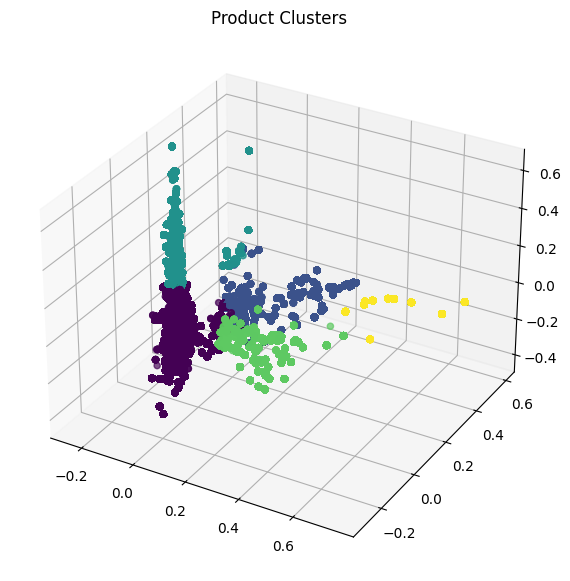

In [ ]:
# 2. K-Means after applying PCA
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Step 2: Load the Dataset
# Update this path to where you have stored the dataset
df = pd.read_csv('/content/clustering-data.csv', encoding='latin1')

# Step 3: Preprocess the Data
def preprocess_text(text):
    # Tokenize, remove stopwords, and keep only alphabetic words
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    return ' '.join(tokens)

# Applying the preprocessing function to the Description column
df['Processed_Description'] = df['Description'].dropna().apply(preprocess_text)

# Step 4: Feature Extraction
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Processed_Description'].dropna())

# Step 5: Dimensionality Reduction for Visualization
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())


# Step 6: Clustering
num_clusters = 5  # You might want to adjust this based on experimentation
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(reduced_features)

# Step 7: Visualize Clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(reduced_features[:,0], reduced_features[:,1], reduced_features[:,2],
                     c=clusters, cmap='viridis')
ax.set_title('Product Clusters')
plt.show()


*Compare the results from applying Kmeans directly to the processed dataset with results after applying PCA.*

**Answer**:

To compare the results from applying KMeans directly to the processed dataset with the results after applying PCA, we would typically look at several aspects, including cluster cohesion, separation, and potentially the interpretability of the clusters.

### 1. Cluster Cohesion and Separation

- **Direct KMeans Application**: Without PCA, the clustering is done in a high-dimensional space, which could potentially result in more distinct clusters if the relevant features contribute to the separation. We can evaluate cluster cohesion and separation using metrics like silhouette scores, which combine both cohesion and separation into a single metric.
  
- **KMeans after PCA**: PCA reduces dimensionality, which might simplify the data and potentially enhance cluster separation if PCA retains the most significant variance. However, if important variance that contributes to cluster definition is lost, the clusters might become less distinct.

### 2. Interpretability and Visualization

- **Direct KMeans Application**: Interpreting high-dimensional clusters can be challenging, as visualizing more than three dimensions is not straightforward. we typically rely on quantitative metrics or dimensional reduction techniques just for visualization.

- **KMeans after PCA**: PCA-reduced data can be easily visualized, especially when reduced to 2 or 3 dimensions. This can provide intuitive insights into how the data is clustered. However, the reduction might lead to overlapping clusters if important information is lost.


*What do you conclude ?*

**Answer**

The best method depends on the specific goals and context of our analysis:

- If our primary goal is to achieve the most accurate and meaningful clustering without the need for visualization, direct KMeans might be preferable.

- If we need to visualize the data for exploratory analysis or to communicate our findings, and the dataset is too large or complex for effective high-dimensional visualization, PCA followed by KMeans offers a practical solution.

Ultimately, the decision should be based on a combination of quantitative evaluation and the specific requirements of our analysis or application.